In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
from datetime import datetime
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose



### Clear Warning
import warnings; 
warnings.simplefilter('ignore')

In [2]:
file_path = (r'C:\Users\sumar\OneDrive\Documents\data scientist\Agile_project\sale_forecast\data\superstore_data.csv')
df = pd.read_csv(file_path,encoding='iso-8859-1')

In [3]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [4]:
df.tail()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384



dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')

# Data Processing

In [5]:
print(f"Shape of dataset is   ", df.shape)

Shape of dataset is    (9800, 18)


In [6]:
print('------Info Columns------ \n')
df.info()

------Info Columns------ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-n

In [7]:
#drop the unneccessary columns

df = df.drop(['Row_ID', 'Order_ID', 'Customer_ID','Customer_Name', 'Postal_Code','Product_ID', 'Country'],axis=1)

In [8]:
df['Order_Date']= pd.to_datetime(df['Order_Date'])
#Create a Month Year Column
df['Year Month'] = df['Order_Date'].apply(lambda x: x.strftime('%Y-%m'))

In [9]:
print('------Info Columns------ \n')
df.info()
print(df.shape)

------Info Columns------ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order_Date    9800 non-null   datetime64[ns]
 1   Ship_Date     9800 non-null   object        
 2   Ship_Mode     9800 non-null   object        
 3   Segment       9800 non-null   object        
 4   City          9800 non-null   object        
 5   State         9800 non-null   object        
 6   Region        9800 non-null   object        
 7   Category      9800 non-null   object        
 8   Sub_Category  9800 non-null   object        
 9   Product_Name  9800 non-null   object        
 10  Sales         9800 non-null   float64       
 11  Year Month    9800 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 918.9+ KB
(9800, 12)


In [10]:
df.head()

,Order_Date,Ship_Date,Ship_Mode,Segment,City,State,Region,Category,Sub_Category,Product_Name,Sales,Year Month
0,2017-08-11,11/11/2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-08
1,2017-08-11,11/11/2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-08
2,2017-12-06,16/06/2017,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-12
3,2016-11-10,18/10/2016,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-11
4,2016-11-10,18/10/2016,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,2016-11


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48


In [12]:
# Convert the 'Year Month' column to a datetime object
df['Year Month'] = pd.to_datetime(df['Year Month'])

# Group by quarters and sum the sales for each quarter
quarterly_sales = df.groupby(pd.PeriodIndex(df['Year Month'], freq='Q')).sum()['Sales'].reset_index()

# Rename the columns for clarity
quarterly_sales.columns = ['Quarter', 'Sales']

print(quarterly_sales)


   Quarter        Sales
0   2015Q1   95444.4300
1   2015Q2   83411.8406
2   2015Q3  138500.2233
3   2015Q4  162499.7142
4   2016Q1   84565.4160
5   2016Q2   97334.4352
6   2016Q3  143003.2370
7   2016Q4  134532.9172
8   2017Q1  135945.9150
9   2017Q2  144628.9808
10  2017Q3  128221.0637
11  2017Q4  191396.5905
12  2018Q1  183444.5482
13  2018Q2  125644.5095
14  2018Q3  202504.9235
15  2018Q4  210458.0380


In [13]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

In [14]:
df['year_order_date'] = df['Order_Date'].dt.year
df['month_order_date'] = df['Order_Date'].dt.month
df['day_of_week_order_date'] = df['Order_Date'].dt.day_of_week
df['day_of_year_order_date'] = df['Order_Date'].dt.day_of_year
df['weekday_date_order_date'] = df['Order_Date'].dt.weekday
df['quarter_order_date'] = df['Order_Date'].dt.quarter


df['year_Ship_Date'] = df['Ship_Date'].dt.year
df['month_Ship_Date'] = df['Ship_Date'].dt.month
df['day_of_week_Ship_Date'] = df['Ship_Date'].dt.day_of_week
df['day_of_year_Ship_Date'] = df['Ship_Date'].dt.day_of_year
df['weekday_date_Ship_Date'] = df['Ship_Date'].dt.weekday
df['quarter_Ship_Date'] = df['Ship_Date'].dt.quarter

In [15]:
df.head()

,Order_Date,Ship_Date,Ship_Mode,Segment,City,State,Region,Category,Sub_Category,Product_Name,...,day_of_week_order_date,day_of_year_order_date,weekday_date_order_date,quarter_order_date,year_Ship_Date,month_Ship_Date,day_of_week_Ship_Date,day_of_year_Ship_Date,weekday_date_Ship_Date,quarter_Ship_Date
0,2017-08-11,2017-11-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,...,4,223,4,3,2017,11,5,315,5,4
1,2017-08-11,2017-11-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",...,4,223,4,3,2017,11,5,315,5,4
2,2017-12-06,2017-06-16,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,...,2,340,2,4,2017,6,4,167,4,2
3,2016-11-10,2016-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,...,3,315,3,4,2016,10,1,292,1,4
4,2016-11-10,2016-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold N Roll Cart System,...,3,315,3,4,2016,10,1,292,1,4


# Exploratory Data Analysis EDA

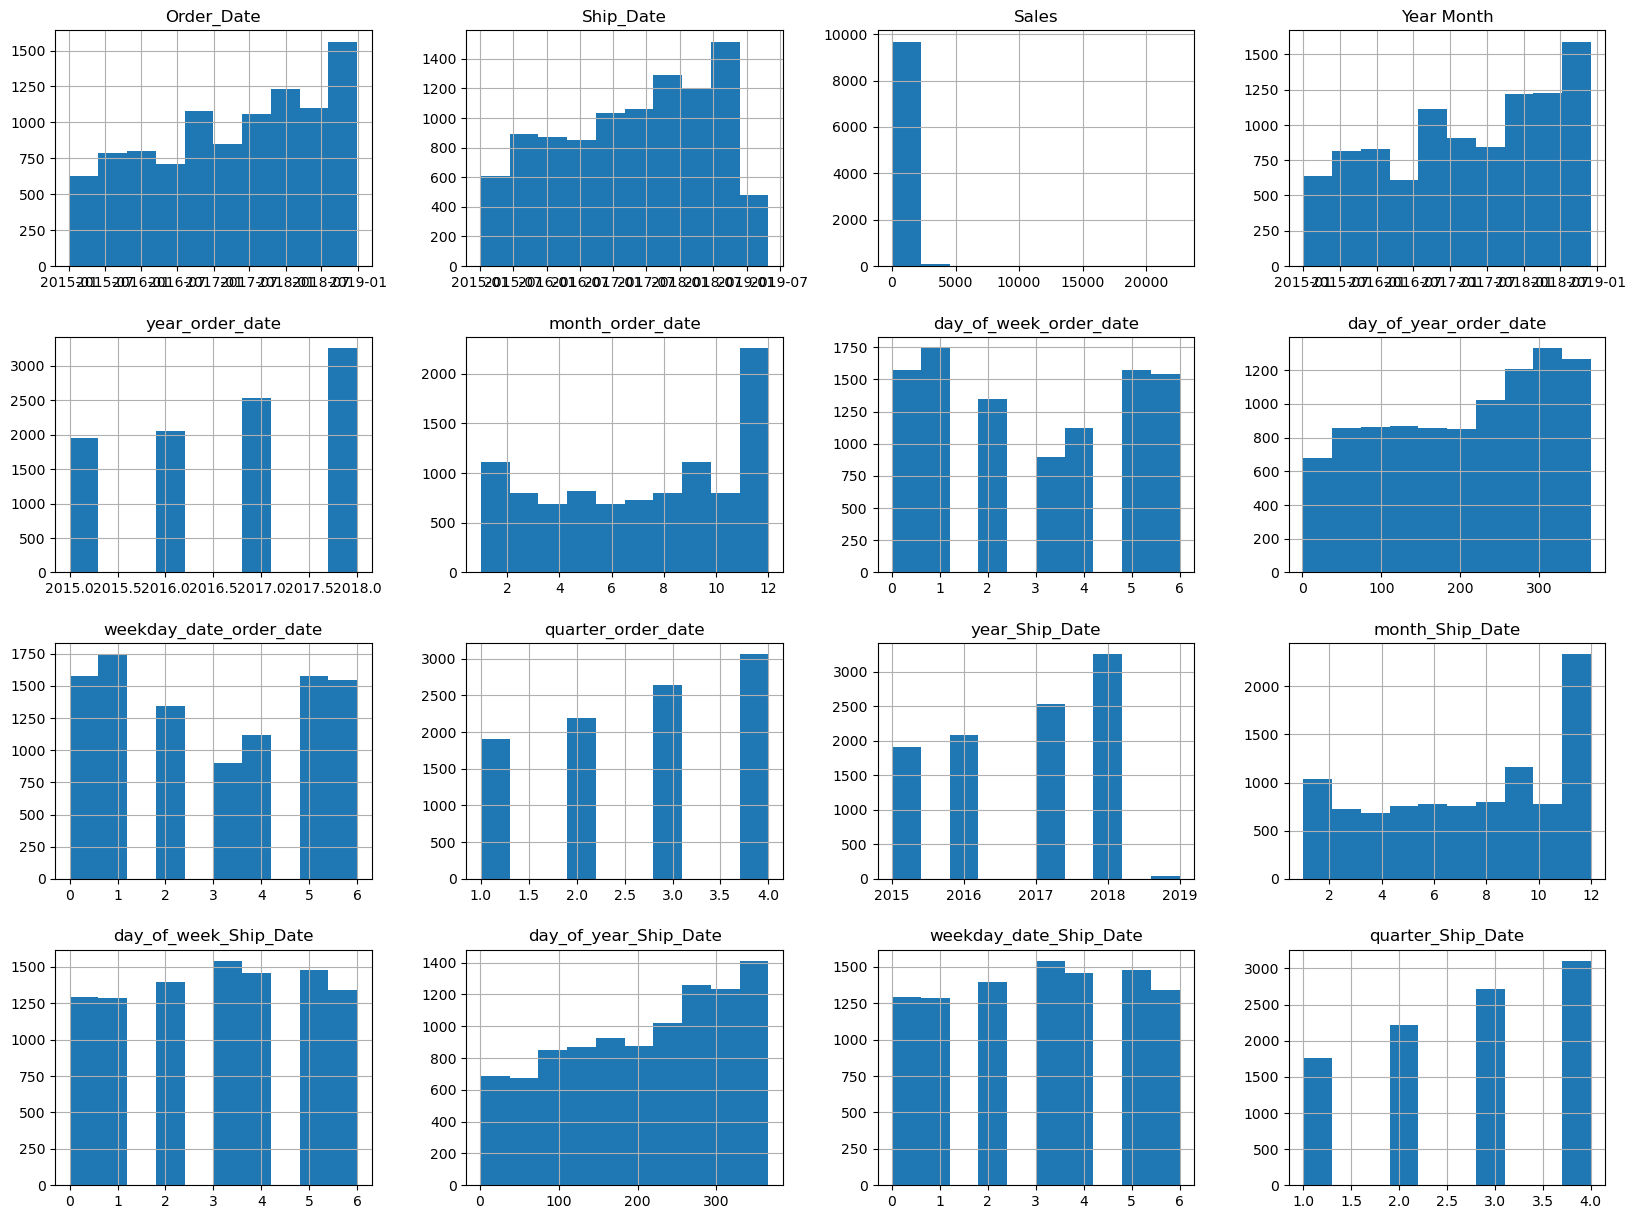

In [16]:
df.hist(figsize = (20,15))
plt.show()

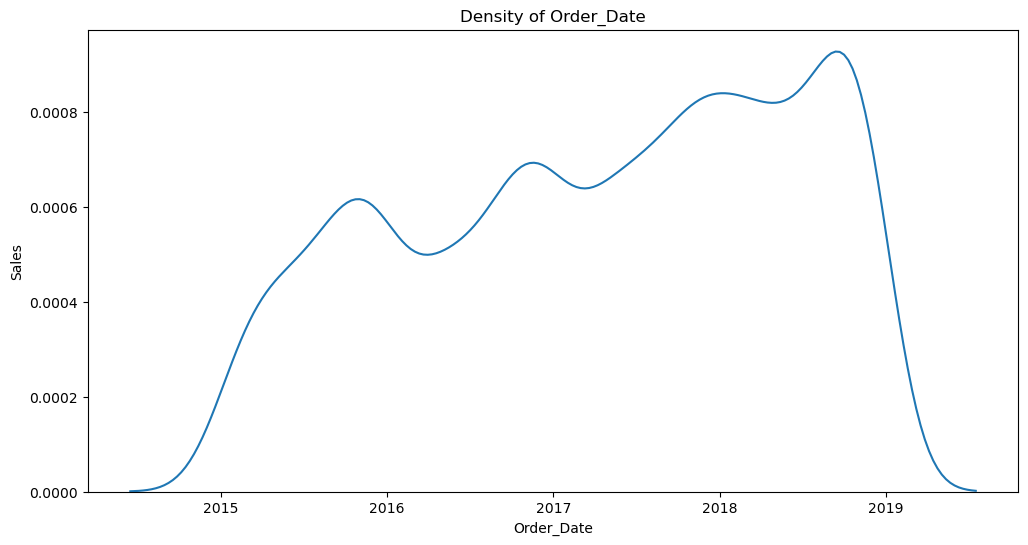

In [17]:
plt.figure(figsize=(12,6))
sns.kdeplot(x='Order_Date',data=df)
plt.title('Density of Order_Date')
plt.xlabel('Order_Date')
plt.ylabel('Sales')
plt.show()

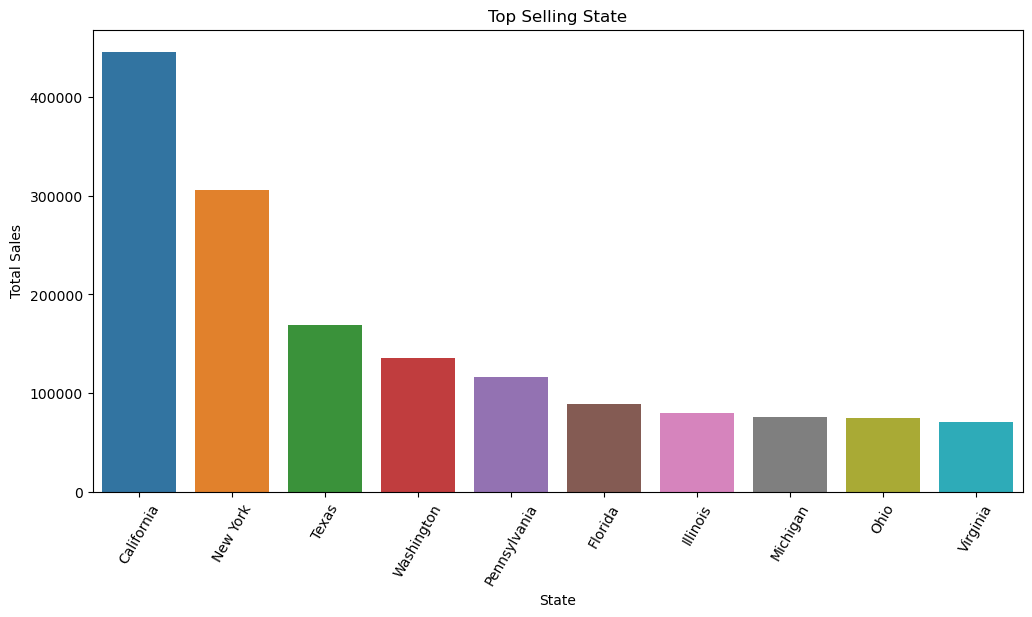

In [18]:
most_sold_state = df.groupby('State')['Sales'].sum().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(x=most_sold_state.index,y=most_sold_state.values)
plt.xticks(rotation=60)
plt.title('Top Selling State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

In [19]:
product_sales = pd.DataFrame(df.groupby('Category').sum()['Sales'])
product_sales = product_sales.sort_values('Sales', ascending = False)
product_sales[:20]

,Sales
Category,
Technology,827455.8730
Furniture,728658.5757
Office Supplies,705422.3340


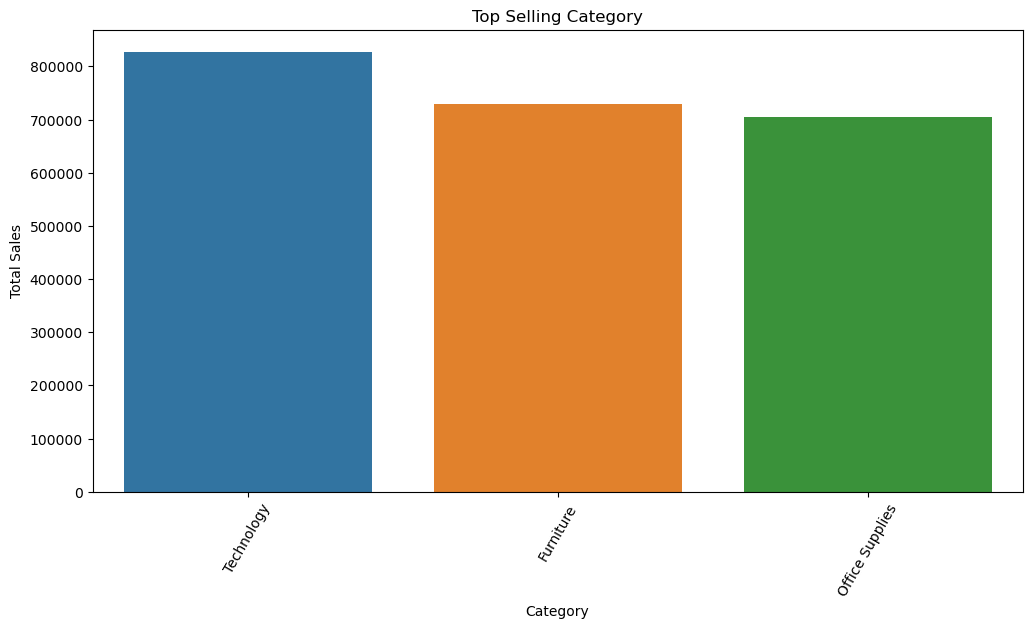

In [20]:
most_sold_category = df.groupby('Category')['Sales'].sum().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(x=most_sold_category.index, y=most_sold_category.values)
plt.xticks(rotation=60)
plt.title('Top Selling Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

In [21]:
df.columns

Index(['Order_Date', 'Ship_Date', 'Ship_Mode', 'Segment', 'City', 'State',
       'Region', 'Category', 'Sub_Category', 'Product_Name', 'Sales',
       'Year Month', 'year_order_date', 'month_order_date',
       'day_of_week_order_date', 'day_of_year_order_date',
       'weekday_date_order_date', 'quarter_order_date', 'year_Ship_Date',
       'month_Ship_Date', 'day_of_week_Ship_Date', 'day_of_year_Ship_Date',
       'weekday_date_Ship_Date', 'quarter_Ship_Date'],
      dtype='object')

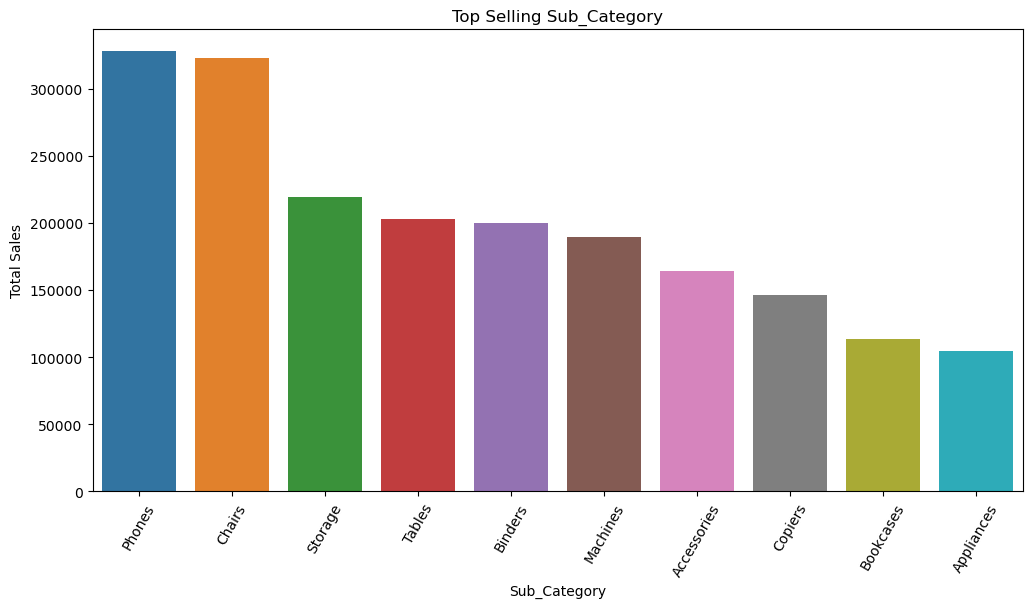

In [22]:
most_sold_subcategory = df.groupby('Sub_Category')['Sales'].sum().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(x=most_sold_subcategory.index,y=most_sold_subcategory.values)
plt.xticks(rotation=60)
plt.title('Top Selling Sub_Category')
plt.xlabel('Sub_Category')
plt.ylabel('Total Sales')
plt.show()

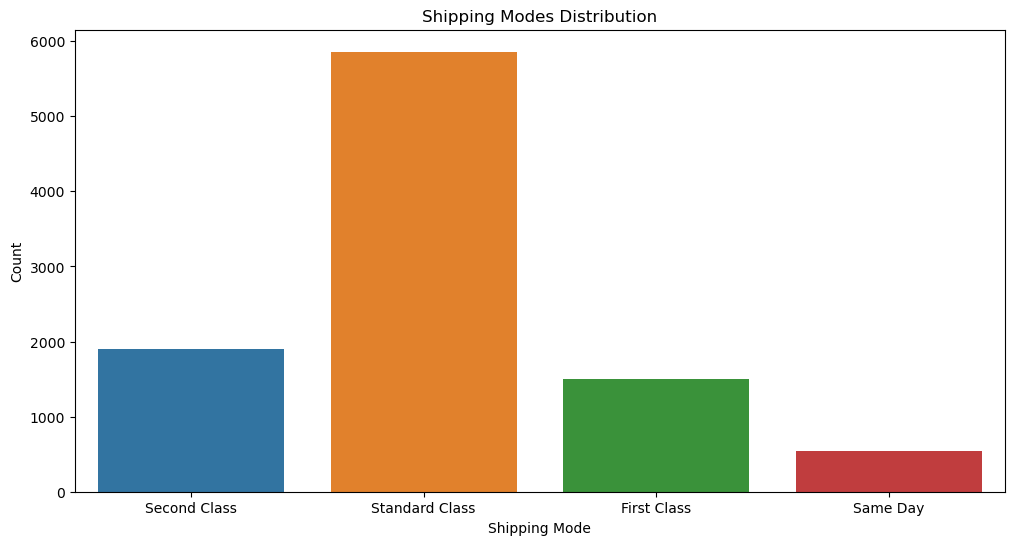

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x='Ship_Mode', data=df)
plt.title('Shipping Modes Distribution')
plt.xlabel('Shipping Mode')
plt.ylabel('Count')
plt.show()

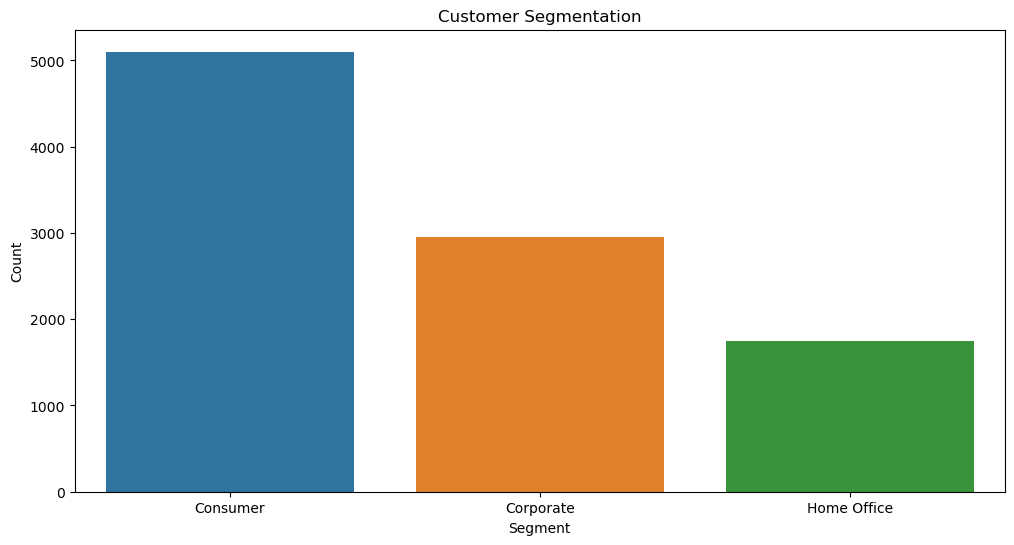

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x='Segment', data=df)
plt.title('Customer Segmentation')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

In [25]:
sale_trend = pd.DataFrame(df.groupby('Year Month').sum()['Sales'].reset_index())
sale_trend

,Year Month,Sales
0,2015-01-01,28828.2540
1,2015-02-01,12588.4840
2,2015-03-01,54027.6920
3,2015-04-01,24710.0160
4,2015-05-01,29520.4900
5,2015-06-01,29181.3346
6,2015-07-01,35194.5580
7,2015-08-01,37349.2655
8,2015-09-01,65956.3998
9,2015-10-01,34561.9470


In [26]:
sale_trend.index = pd.to_datetime(sale_trend['Year Month'])
sale_trend.drop(columns='Year Month',inplace=True)
sale_trend.head()

,Sales
Year Month,
2015-01-01,28828.254
2015-02-01,12588.484
2015-03-01,54027.692
2015-04-01,24710.016
2015-05-01,29520.490


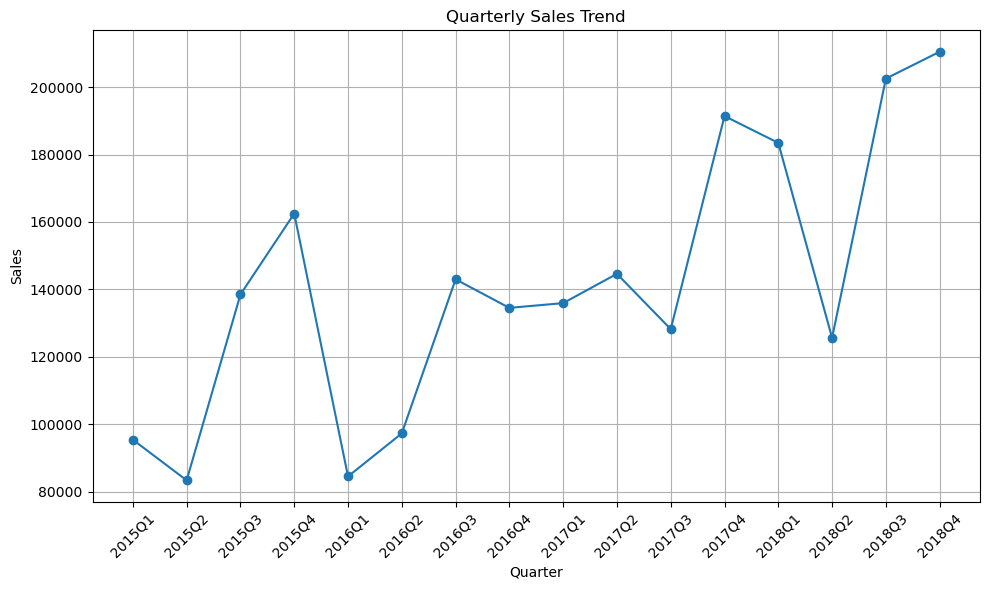

In [27]:
# Convert the 'Quarter' column to strings
quarterly_sales['Quarter'] = quarterly_sales['Quarter'].astype(str)

# Plot the quarterly sales data
plt.figure(figsize=(10, 6))
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Sales'], marker='o', linestyle='-')
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.grid(True)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


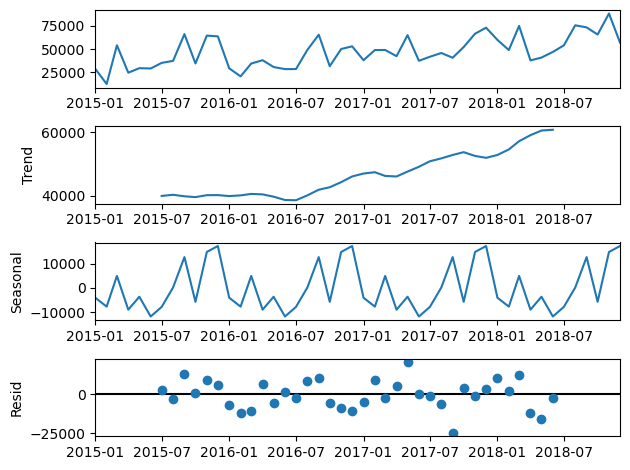

In [28]:
#decomposition of the data

decompose_df = seasonal_decompose(sale_trend, model="additive")
decompose_df.plot()
plt.show()

<AxesSubplot:xlabel='Year Month'>

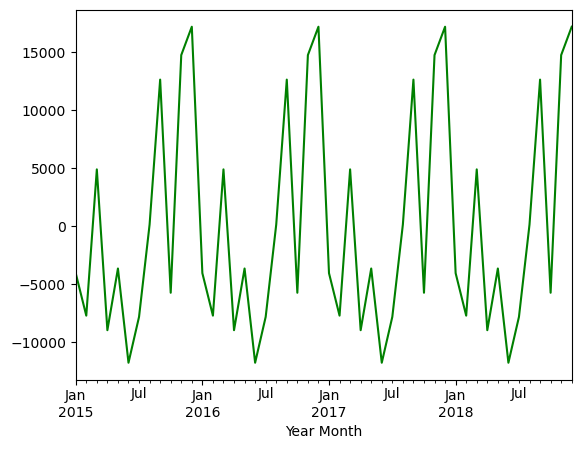

In [29]:
seasonality=decompose_df.seasonal
seasonality.plot(color='green')

In [30]:
#check the stationarity of the data

dftest = adfuller(sale_trend['Sales'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -1.145081958660495
2. P-Value :  0.6967631967119418
3. Num Of Lags :  7
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 40
5. Critical Values :
	 1% :  -3.6055648906249997
	 5% :  -2.937069375
	 10% :  -2.606985625


In [31]:
#statinarity of the data
seasonal_period = 4  # Example: Quarterly data with a seasonal period of 4

# Calculate the seasonal difference
seasonal_diff = sale_trend['Sales'] - sale_trend['Sales'].shift(seasonal_period)


# Remove missing values (resulting from the seasonal shift)
seasonal_diff = seasonal_diff.dropna()

# Check the stationarity of the seasonal difference using ADF test
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(seasonal_diff)
p_value = adf_result[1]
print(p_value)

if p_value < 0.05:
    print("Seasonal difference is stationary.")
else:
    print("Seasonal difference is not stationary.")
    
    


0.010477216257380458
Seasonal difference is stationary.


H0 = null hypthesis= if the P-Value is =<0.05 then data is stationary
H1= alternative hypothesis= if P-Value is >0.05 then data is non-stationary.

if data is non-statinary we need to make it stationary by using rolling mean and rolling standard deviation.
in our case we see P-Value is less than 0.05 so we accept null hypothesis and 
data is sationary. so don't need to do further steps to make it stationary

In [32]:
pred_date=[sale_trend.index[-1]+ DateOffset(months=x)for x in range(0,24)]
pred_date=pd.DataFrame(index=pred_date[1:],columns=sale_trend.columns)
pred_date

,Sales
2019-01-01,NaN
2019-02-01,NaN
2019-03-01,NaN
2019-04-01,NaN
2019-05-01,NaN
2019-06-01,NaN
2019-07-01,NaN
2019-08-01,NaN
2019-09-01,NaN
2019-10-01,NaN


In [33]:
data=pd.concat([sale_trend,pred_date])
print(data)

                Sales
2015-01-01  28828.254
2015-02-01  12588.484
2015-03-01  54027.692
2015-04-01  24710.016
2015-05-01  29520.490
...               ...
2020-07-01        NaN
2020-08-01        NaN
2020-09-01        NaN
2020-10-01        NaN
2020-11-01        NaN

[71 rows x 1 columns]


In [34]:

#SARIMA model for forecast
sale_trend = sale_trend.asfreq('MS')
model= SARIMAX(sale_trend['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

<AxesSubplot:>

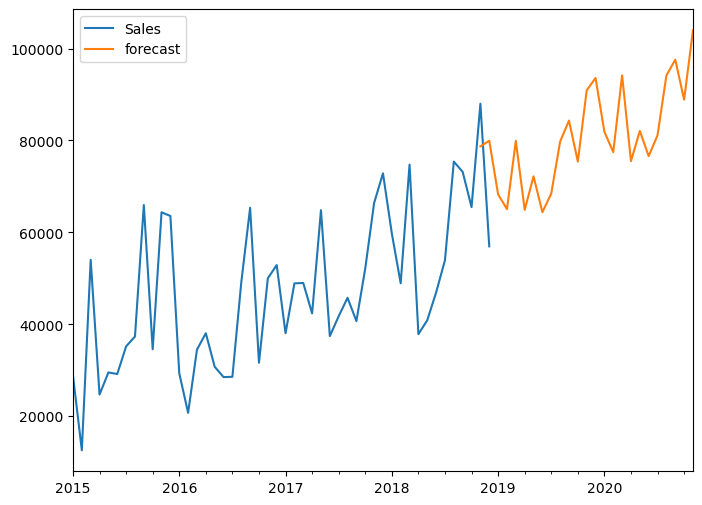

In [35]:
data['forecast'] = results.predict(start = 46, end = 90, dynamic= True)  
data[['Sales', 'forecast']].plot(figsize=(8, 6))

The forecast sale plot for next two years (2019-2020) follows the same pattern as previously provided data.


# Evaluation of SARIMA model

In [36]:
#split data into train and test set
train_size = int(len(sale_trend) * 0.8)
train_data = sale_trend['Sales'][:train_size]
test_data = sale_trend['Sales'][train_size:]

In [37]:
model = SARIMAX(train_data, order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

# Forecast the test data
forecast = result.get_forecast(steps=len(test_data))
forecast_mean = forecast.predicted_mean


In [38]:
# Calculate evaluation metrics
mae = mean_absolute_error(test_data, forecast_mean)
mse = mean_squared_error(test_data, forecast_mean)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 11308.367813334151
Mean Squared Error (MSE): 190021224.07748294
Root Mean Squared Error (RMSE): 13784.8186087987


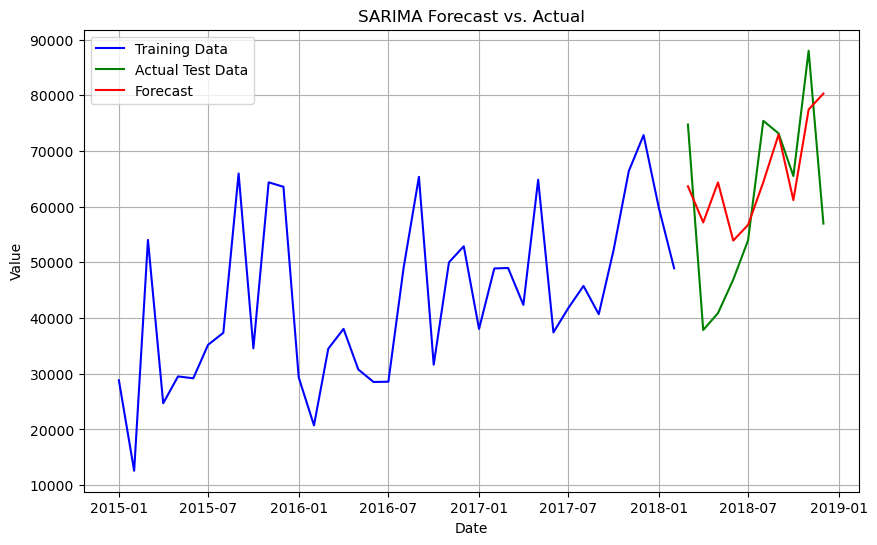

In [39]:
# Visualize the actual vs. forecasted data
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data, label='Actual Test Data', color='green')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMA Forecast vs. Actual')
plt.legend()
plt.grid(True)
plt.show()

# Holt_Winter_Theta Model

In [41]:
theta = (sale_trend['Sales'].iloc[-1] - sale_trend['Sales'].iloc[0]) / len(sale_trend)
forecast_period = 12
forecast_values = []

for i in range(forecast_period):
    forecast_value = sale_trend['Sales'].iloc[-1] + i * theta
    forecast_values.append(forecast_value)

In [42]:
# Create a date range for the forecast
last_date = sale_trend.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_period, freq='MS')

In [43]:
forecast_df = pd.DataFrame({'Forecast': forecast_values}, index=forecast_dates)

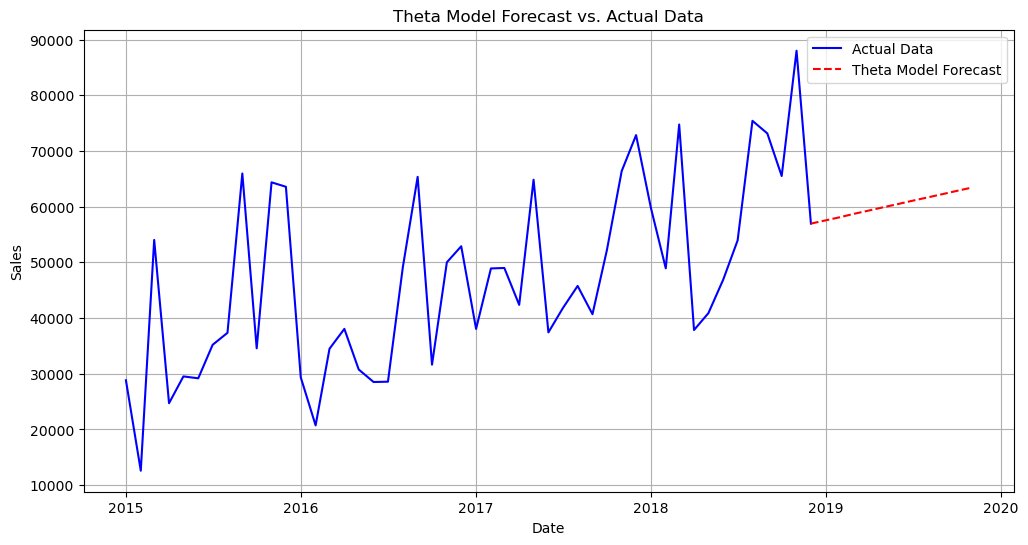

In [45]:
# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(sale_trend.index, sale_trend['Sales'], label='Actual Data', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Theta Model Forecast', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Theta Model Forecast vs. Actual Data')
plt.legend()
plt.grid(True)
plt.show()

    

In [48]:
print(forecast_df.head())

                Forecast
2018-12-01  56959.235800
2019-01-01  57545.297921
2019-02-01  58131.360042
2019-03-01  58717.422162
2019-04-01  59303.484283


In [49]:
print(forecast_df.tail())

                Forecast
2019-07-01  61061.670646
2019-08-01  61647.732767
2019-09-01  62233.794888
2019-10-01  62819.857008
2019-11-01  63405.919129


# Evaluation of Theta Model

In [46]:
#split data into train and test dataset
train_size = int(len(sale_trend) * 0.8)
train_data = sale_trend['Sales'][:train_size]
test_data = sale_trend['Sales'][train_size:]

In [47]:
# Theta model forecast for the test data
theta_forecast_test = forecast_values[:len(test_data)]

In [53]:
mae_train = mean_absolute_error(train_data, sale_trend['Sales'][:train_size])
mse_train = mean_squared_error(train_data, sale_trend['Sales'][:train_size])
rmse_train = np.sqrt(mse_train)

mae_test = mean_absolute_error(test_data, theta_forecast_test)
mse_test = mean_squared_error(test_data, theta_forecast_test)
rmse_test = np.sqrt(mse_test)

In [54]:
print(f"Theta Model Train Set Metrics:")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")

print(f"Theta Model Test Set Metrics:")
print(f"Mean Absolute Error (MAE): {mae_test}")

Theta Model Train Set Metrics:
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Theta Model Test Set Metrics:
Mean Absolute Error (MAE): 13616.061835416665


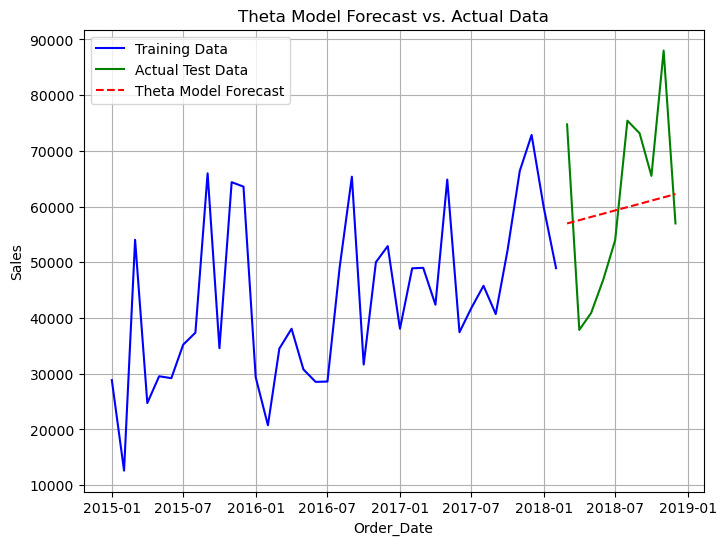

In [56]:
#Visualize the actual data and forecasts   
    
plt.figure(figsize=(8, 6))
plt.plot(train_data.index, train_data, label='Training Data', color='blue')
plt.plot(test_data.index, test_data, label='Actual Test Data', color='green')
plt.plot(test_data.index, theta_forecast_test, label='Theta Model Forecast', color='red', linestyle='--')
plt.xlabel('Order_Date')
plt.ylabel('Sales')
plt.title('Theta Model Forecast vs. Actual Data')
plt.legend()    
plt.grid(True)
plt.show()